# 1. Import des librairies

Dans un premier temps, nous devons importer les bibliothèques requises.

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Bidirectional 
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

# 2. Téléchargement des datasets

### 2.1. df_artiste

In [2]:
df_artiste = pd.read_csv('C:/Users/Utilisateur/Downloads/15ad977f-ed5b-4a7d-94dd-84e1d2fc8b24.csv')
df_artiste.head()

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/


In [3]:
df_artiste.describe()

,Songs,Popularity
count,4167.000000,4166.000000
mean,91.021358,1.831325
std,96.655819,8.036739
min,0.000000,0.000000
25%,26.000000,0.000000
50%,64.000000,0.000000
75%,123.000000,1.000000
max,1029.000000,205.500000


In [4]:
df_artiste.shape

(4168, 5)

In [5]:
df_artiste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      4167 non-null   object 
 1   Genres      4163 non-null   object 
 2   Songs       4167 non-null   float64
 3   Popularity  4166 non-null   float64
 4   Link        4167 non-null   object 
dtypes: float64(2), object(3)
memory usage: 162.9+ KB


In [6]:
df_artiste['Artist'].value_counts()

Ivete Sangalo                1
Supertramp                   1
Fifth Harmony                1
Spice Girls                  1
Take That                    1
                            ..
Nívea Silva                  1
Daniel Costa                 1
The Edwin Hawkins Singers    1
Melosweet                    1
Johnny Clegg                 1
Name: Artist, Length: 4167, dtype: int64

On transforme les floats en object

In [7]:
df_artiste['Songs'] = df_artiste['Songs'].astype(object)
df_artiste['Popularity'] = df_artiste['Popularity'].astype(object)
print(df_artiste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Artist      4167 non-null   object
 1   Genres      4163 non-null   object
 2   Songs       4167 non-null   object
 3   Popularity  4166 non-null   object
 4   Link        4167 non-null   object
dtypes: object(5)
memory usage: 162.9+ KB
None


### 2.2. df_lyric

In [8]:
df_lyric = pd.read_csv('C:/Users/Utilisateur/Downloads/lyrics-data.csv')
df_lyric.head()

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt


In [9]:
df_lyric.shape

(379931, 5)

In [10]:
df_lyric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ALink     379930 non-null  object
 1   SName     379928 non-null  object
 2   SLink     379930 non-null  object
 3   Lyric     379854 non-null  object
 4   language  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB


### 2.3. Fusion des dataset

In [11]:
df = (df_lyric.merge(df_artiste, left_on= 'ALink' ,right_on= 'Link', how='outer'))

In [12]:
df.head()

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/


In [14]:
df.head()

,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379937 entries, 0 to 379936
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ALink       379930 non-null  object
 1   SName       379928 non-null  object
 2   SLink       379930 non-null  object
 3   Lyric       379854 non-null  object
 4   language    365296 non-null  object
 5   Artist      378993 non-null  object
 6   Genres      378954 non-null  object
 7   Songs       378993 non-null  object
 8   Popularity  378992 non-null  object
 9   Link        378993 non-null  object
dtypes: object(10)
memory usage: 31.9+ MB


In [16]:
df['Genres'].value_counts()

Gospel/Religioso          20096
Sertanejo                 10847
Rock                       5870
Romântico                  5233
Forró                      5114
                          ...  
Rap; Hip Hop; Infantil        1
Funk; Trap; Rap               1
Sertanejo; Reggae             1
Funk Carioca; Blues           1
Trap; Hip Hop; R&B            1
Name: Genres, Length: 1750, dtype: int64

Nous observons que la colonne Genres doit être spliter.

In [17]:
df_Genres = df['Genres'].str.split(';', expand=True)
for colums in df_Genres :
    df_Genres[colums] = df_Genres[colums].str.strip()

In [18]:
df=pd.merge(df,df_Genres,left_on=df.index,right_on=df_Genres.index)
df

,key_0,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link,0,1,2,3
0,0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
1,1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
2,2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
3,3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
4,4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379932,379932,NaN,NaN,NaN,NaN,NaN,Seiling,Classic Rock; Pop/Rock,0.0,0.0,/seiling/,Classic Rock,Pop/Rock,None,None
379933,379933,NaN,NaN,NaN,NaN,NaN,Fabiane Gurgel,Gospel/Religioso; Forró,0.0,0.0,/fabiane-gurgel/,Gospel/Religioso,Forró,None,None
379934,379934,NaN,NaN,NaN,NaN,NaN,Essência do Rei,Gospel/Religioso,0.0,0.0,/essencia-do-rei/,Gospel/Religioso,None,None,None
379935,379935,NaN,NaN,NaN,NaN,NaN,Scalene,Rock Alternativo; Rock; Pop/Rock,0.0,0.2,/scalene/,Rock Alternativo,Rock,Pop/Rock,None


Nous renomons les colonnes 0 à 4

In [19]:
df.rename(columns={0: "G_n°1", 1: "G_n°2", 2: "G_n°3", 3: "G_n°4"}, inplace=True)
df

,key_0,ALink,SName,SLink,Lyric,language,Artist,Genres,Songs,Popularity,Link,G_n°1,G_n°2,G_n°3,G_n°4
0,0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
1,1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
2,2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
3,3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
4,4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Pop,Axé,Romântico,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379932,379932,NaN,NaN,NaN,NaN,NaN,Seiling,Classic Rock; Pop/Rock,0.0,0.0,/seiling/,Classic Rock,Pop/Rock,None,None
379933,379933,NaN,NaN,NaN,NaN,NaN,Fabiane Gurgel,Gospel/Religioso; Forró,0.0,0.0,/fabiane-gurgel/,Gospel/Religioso,Forró,None,None
379934,379934,NaN,NaN,NaN,NaN,NaN,Essência do Rei,Gospel/Religioso,0.0,0.0,/essencia-do-rei/,Gospel/Religioso,None,None,None
379935,379935,NaN,NaN,NaN,NaN,NaN,Scalene,Rock Alternativo; Rock; Pop/Rock,0.0,0.2,/scalene/,Rock Alternativo,Rock,Pop/Rock,None


Nous supprimons les colonnes qui ne vont pas nous servir.

In [20]:
df.drop(df.columns[[0,1,3,7,10]], axis=1, inplace=True)
df

,SName,Lyric,language,Artist,Songs,Popularity,G_n°1,G_n°2,G_n°3,G_n°4
0,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,313.0,4.4,Pop,Axé,Romântico,None
1,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,313.0,4.4,Pop,Axé,Romântico,None
2,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,313.0,4.4,Pop,Axé,Romântico,None
3,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,313.0,4.4,Pop,Axé,Romântico,None
4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,313.0,4.4,Pop,Axé,Romântico,None
...,...,...,...,...,...,...,...,...,...,...
379932,NaN,NaN,NaN,Seiling,0.0,0.0,Classic Rock,Pop/Rock,None,None
379933,NaN,NaN,NaN,Fabiane Gurgel,0.0,0.0,Gospel/Religioso,Forró,None,None
379934,NaN,NaN,NaN,Essência do Rei,0.0,0.0,Gospel/Religioso,None,None,None
379935,NaN,NaN,NaN,Scalene,0.0,0.2,Rock Alternativo,Rock,Pop/Rock,None


In [21]:
df.drop(df.columns[[7,8,9]], axis=1, inplace=True)
df

,SName,Lyric,language,Artist,Songs,Popularity,G_n°1
0,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt,Ivete Sangalo,313.0,4.4,Pop
1,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt,Ivete Sangalo,313.0,4.4,Pop
2,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt,Ivete Sangalo,313.0,4.4,Pop
3,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt,Ivete Sangalo,313.0,4.4,Pop
4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt,Ivete Sangalo,313.0,4.4,Pop
...,...,...,...,...,...,...,...
379932,NaN,NaN,NaN,Seiling,0.0,0.0,Classic Rock
379933,NaN,NaN,NaN,Fabiane Gurgel,0.0,0.0,Gospel/Religioso
379934,NaN,NaN,NaN,Essência do Rei,0.0,0.0,Gospel/Religioso
379935,NaN,NaN,NaN,Scalene,0.0,0.2,Rock Alternativo


On compare les genres avec la langue pour voir quels sont ceux ayant le nombre le plus élevé dans le dataset. 

In [22]:
df['language'].value_counts()

en     191814
pt     157393
es       9917
rw       1679
it       1432
fr       1225
de        844
fi        145
sv        112
ro         97
no         89
is         86
tl         69
pl         47
gl         36
ga         32
tr         32
id         26
cy         23
su         19
af         19
sw         19
ko         17
nl         14
da         13
ca         13
et         13
ms          8
ja          7
st          7
ht          5
gd          4
ru          4
ar          4
eu          4
cs          3
ku          3
ny          3
mg          3
lg          2
jw          2
hu          2
vi          1
iw          1
sr          1
hmn         1
hr          1
fa          1
sq          1
zh          1
lv          1
sl          1
Name: language, dtype: int64

Maintenant, nous allons prendre uniquement des chansons en anglais, nous devons donc sous-ensembler l'ensemble de données en conséquence

In [23]:
# ne prendre que des chansons en anglais
df = df[df['language']=='en']

Je n'ai pas beaucoup de mémoire dans ce noyau kaggle. Nous ne pouvons donc pas entraîner le modèle sur l'ensemble de données. Je vais donc prendre les 700 premières lignes.

In [24]:
# prendre les 700 premières lignes
df = df[:700]

In [25]:
# shape
df.shape

(700, 7)

### Data Visualization

In [26]:
df['Nombre_de_mot'] = df['Lyric'].apply(lambda x:len(str(x).split()))
df.head()

,SName,Lyric,language,Artist,Songs,Popularity,G_n°1,Nombre_de_mot
69,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,en,Ivete Sangalo,313.0,4.4,Pop,299
86,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",en,Ivete Sangalo,313.0,4.4,Pop,161
88,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",en,Ivete Sangalo,313.0,4.4,Pop,159
111,Easy,"Know it sounds funny\nBut, I just can't stand ...",en,Ivete Sangalo,313.0,4.4,Pop,175
140,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,en,Ivete Sangalo,313.0,4.4,Pop,215


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 69 to 5432
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SName          700 non-null    object
 1   Lyric          700 non-null    object
 2   language       700 non-null    object
 3   Artist         700 non-null    object
 4   Songs          700 non-null    object
 5   Popularity     700 non-null    object
 6   G_n°1          700 non-null    object
 7   Nombre_de_mot  700 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 49.2+ KB


In [28]:
# informations statistiques
df['Nombre_de_mot'].describe()

count     700.000000
mean      390.054286
std       189.580887
min         8.000000
25%       265.000000
50%       371.000000
75%       496.250000
max      1495.000000
Name: Nombre_de_mot, dtype: float64

nous pouvons voir que la longueur maximale est de 1495 mots et la longueur moyenne des mots des paroles des chansons est de 390

### Répartition fréquentielle du nombre de mots

C:\Users\Utilisateur\anaconda3\newanaconda\envs\ecole_simplon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Répartition fréquentielle du nombre de mots pour chaque texte extrait')

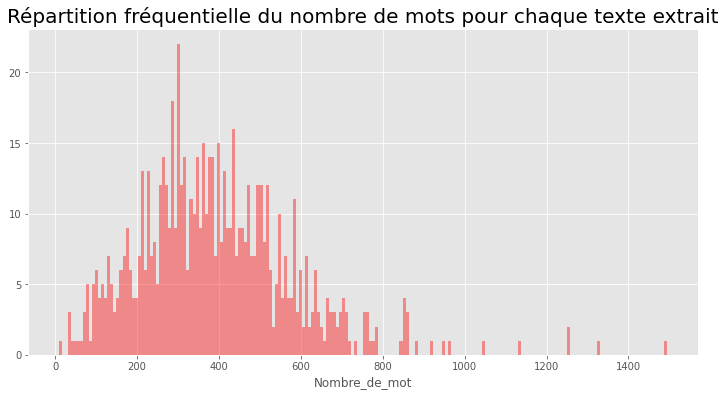

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(df['Nombre_de_mot'],kde = False,color="red",bins=200)
plt.title("Répartition fréquentielle du nombre de mots pour chaque texte extrait", size=20)

## 3.Prétraitement des données

Tout d'abord, nous allons faire de la tokenisation, puis nous allons générer une séquence de n-grammes. Après cela, nous allons faire du rembourrage. Le rembourrage est nécessaire car toutes les phrases sont de longueur différente, nous devons donc les faire de la même longueur. Nous allons le faire en ajoutant 0 au début du texte à l'aide de la fonction pad_sequences de keras

In [30]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Lyric'].astype(str).str.lower())

total_words = len(tokenizer.word_index)+1
tokenized_sentences = tokenizer.texts_to_sequences(df['Lyric'].astype(str))
tokenized_sentences[0]

[2,
 68,
 22,
 5446,
 135,
 2,
 60,
 13,
 281,
 7,
 563,
 1,
 6,
 3,
 225,
 285,
 135,
 3,
 274,
 3379,
 179,
 10,
 13,
 159,
 1466,
 6,
 127,
 9,
 4109,
 1975,
 7,
 21,
 441,
 954,
 5447,
 12,
 63,
 92,
 225,
 157,
 1223,
 810,
 75,
 30,
 31,
 971,
 508,
 35,
 359,
 6,
 624,
 2,
 24,
 49,
 71,
 9,
 581,
 955,
 729,
 126,
 172,
 6,
 1467,
 9,
 357,
 7,
 790,
 3,
 611,
 14,
 109,
 76,
 1224,
 22,
 12,
 63,
 92,
 225,
 157,
 3,
 62,
 2,
 1650,
 42,
 1,
 50,
 36,
 63,
 2912,
 3,
 5448,
 4110,
 28,
 9,
 95,
 357,
 6,
 3,
 117,
 7,
 127,
 4111,
 27,
 599,
 193,
 31,
 1976,
 10,
 3,
 564,
 382,
 27,
 21,
 189,
 173,
 12,
 63,
 92,
 225,
 157,
 1223,
 810,
 75,
 30,
 31,
 971,
 508,
 35,
 359,
 6,
 624,
 2,
 24,
 49,
 71,
 9,
 581,
 955,
 729,
 126,
 172,
 6,
 1467,
 9,
 357,
 7,
 790,
 29,
 611,
 14,
 109,
 76,
 1224,
 22,
 12,
 63,
 92,
 225,
 157,
 3,
 62,
 2,
 1650,
 42,
 1,
 63,
 234,
 13,
 15,
 114,
 3,
 274,
 600,
 22,
 1329,
 2,
 265,
 14,
 18,
 120,
 283,
 29,
 850,
 401,
 35,
 126,


In [31]:
# Slash séquences en séquence n gramme
input_sequences = list()
for i in tokenized_sentences:
    for t in range(1, len(i)):
        n_gram_sequence = i[:t+1]
        input_sequences.append(n_gram_sequence)

# Pré rembourrage
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [32]:
input_sequences[:10]

array([[   0,    0,    0, ...,    0,    2,   68],
       [   0,    0,    0, ...,    2,   68,   22],
       [   0,    0,    0, ...,   68,   22, 5446],
       ...,
       [   0,    0,    0, ...,   60,   13,  281],
       [   0,    0,    0, ...,   13,  281,    7],
       [   0,    0,    0, ...,  281,    7,  563]])

Pour le modèle, nous devons créer des prédicteurs et une étiquette. Nous allons créer une séquence de N-grammes comme prédicteurs et le mot suivant du N-gramme comme étiquette.

In [34]:
# créer des prédicteurs et une étiquette
import tensorflow as tf
X, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## 4.Modèlisation

Nous allons créer un modèle LSTM. Les LSTM ont un état supplémentaire appelé «état de la cellule» à travers lequel le réseau effectue des ajustements dans le flux d'informations. L'avantage de cet état est que le modèle peut se souvenir ou oublier les tendances de manière plus sélective.

In [ ]:
# création du modèle
model = Sequential()
model.add(Embedding(total_words, 40, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(250)))
model.add(Dropout(0.1))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
earlystop = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(X, y, epochs=10, verbose=1, callbacks=[earlystop])

Epoch 1/10
 142/8563 [..............................] - ETA: 113:32:37 - loss: 6.9600 - accuracy: 0.0416

Augmentez les époques pour augmenter la précision. Je ne l'ai pas fait car cela prend très longtemps

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## 5.Générer de nouvelles paroles de chansons

Maintenant, notre modèle est prêt. Écrivons donc la fonction pour prédire le mot suivant en fonction des mots d'entrée (ou du texte de départ). Nous allons d'abord tokeniser le texte de départ, remplir les séquences et passer dans le modèle entraîné pour obtenir le mot prédit. Les multiples mots prédits peuvent être ajoutés ensemble pour obtenir une séquence prédite.

In [ ]:
def complete_this_song(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

Notre fonction est prête à générer les paroles

In [ ]:
complete_this_song("the sky is blue", 40)

## 6.Enregistrement du modèle

In [ ]:
# save model
from tensorflow.keras.models import load_model
model.save('song_lyrics_generator.h5')